In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

df = pd.read_csv("../Data/Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [25]:
df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB


<Axes: xlabel='AHD', ylabel='count'>

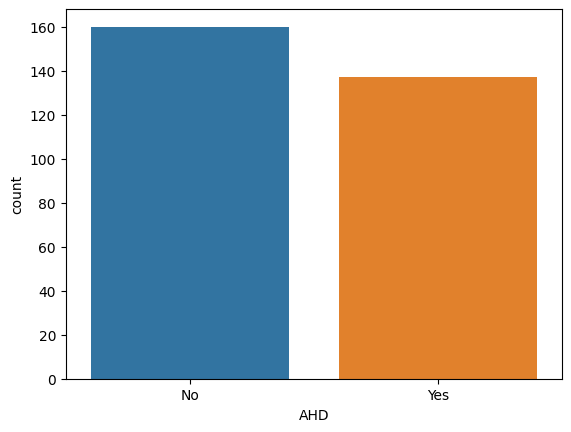

In [27]:
sns.countplot(data= df, x= "AHD")

In [28]:
df = pd.get_dummies(df, drop_first= True)
df.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [30]:
from sklearn.model_selection import train_test_split
#from utils import print_shapes

X, y = df.drop("AHD_Yes", axis= 1), df["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#print_shapes(X_train, X_test, y_train, y_test)

## Random forest

---

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

### Hyperparameter tuning

---

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [100, 150, 200, 300], "max_depth": [5, 10, 15, 20]}
clf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=1,
    scoring="recall",
)

clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [36]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [37]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 300}

## Evaluation

---

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# def evaluate_classification(y_test, y_pred, labels = []):

#     print



## Feature imporance 

---

In [38]:
model.feature_importances_

array([0.07294653, 0.08501667, 0.02874006, 0.05920493, 0.07392019,
       0.00948591, 0.01550543, 0.10368549, 0.02645453, 0.09593657,
       0.0253866 , 0.15721499, 0.04493788, 0.00882617, 0.01367093,
       0.0864337 , 0.09263342])

In [39]:
model.feature_importances_.sum()

1.0

In [40]:
feature_importance = pd.DataFrame([X.columns, model.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance.sort_values(by= "Importance", ascending= False, inplace= True)

<Axes: xlabel='Importance', ylabel='Feature'>

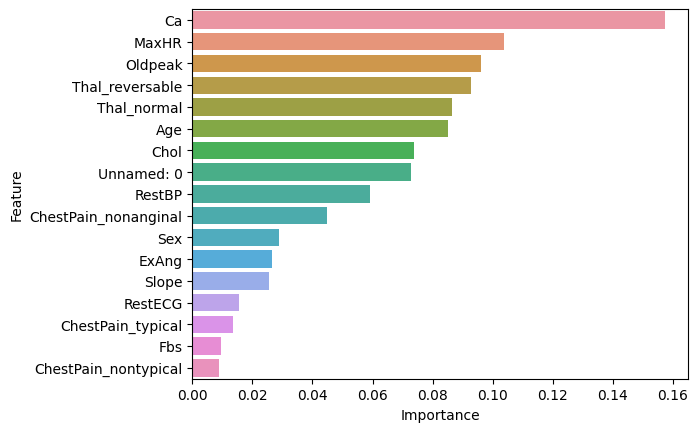

In [41]:
sns.barplot(data= feature_importance, x= "Importance", y= "Feature")